In [ ]:
import os

import matplotlib.pyplot as plt
import numpy as np

import cv2 as cv


In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [ ]:
# Посмотреть на данные
import tarfile
zipfile = '/gdrive/MyDrive/Face recognition/casia_faces.tar.gz'
if zipfile.endswith("tar.gz"):
    tar = tarfile.open(zipfile, "r:gz")
elif zipfile.endswith("tar"):
    tar = tarfile.open(zipfile, "r:")
ll = tar.getmembers( )
for k in ll[:100]:
  tar.extract( k )    
#tar.extractall(  )
tar.close()



In [ ]:
ll[104]

<TarInfo 'casia_faces/person_1454' at 0x7f0ac41d3870>

['casia_faces', 'person_1454', '4673c8f7-203e-4c3a-8f4e-bac3721c79f3.jpg']
person_1454
0
1454


1454

In [ ]:
tar = tarfile.open(zipfile, "r:gz")
tar.extract( ll[106])
tar.close()

In [ ]:
image = []
label = []
path_train = '/content/casia_faces/'
dir_list = os.listdir(path_train)
m = 0
for name in dir_list:
  folder_list = os.listdir(path_train+name+'/')
  print(folder_list)
  z = []
  
  if len(folder_list)>0:
    plt.figure(figsize = (len(folder_list)*3,3))
    for i,k in enumerate(folder_list):
      plt.subplot(1,len(folder_list),i+1)
      img = cv.imread(path_train+name+'/'+k,   )
      z.append(img.shape[:2])
      img = cv.resize(img,(32,32))
      imgl = cv.cvtColor(img, cv.COLOR_RGB2LAB)
      img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
      plt.imshow(img)
      image.append(imgl.reshape(-1,32,32,3))
      label.append(m)
    plt.show()
    m += 1
    print(z)

In [ ]:
m

17

In [ ]:
image  = np.array(image)
label = np.array(label)

Гипотезы:
 размер у всех: 112х112 (проверить)

 формат хранения rgb

 штук разное число по объекту


1. случайная проекция 
2. metric lening
3. перейти в Lab
4. не беру классификатор как есть : много класоов (не так, чтоб много примеров на класс)

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import Sequence

In [ ]:
rand_project = keras.models.Sequential([keras.layers.Conv3D(64,3,1,padding='same',activation='relu', input_shape = (1,32,32,3)),
                                        
                                        keras.layers.Embedding(32*32*64,128,input_length=1),
                                        keras.layers.Flatten(), 
                                        keras.layers.Dense(32),keras.layers.Dense(14),keras.layers.Softmax( )])
rand_project.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=False),metrics =['accuracy'])

In [ ]:

for i in range(3):
  rand_project.layers[i].trainable = False

rand_project.fit(image[:900],keras.utils.to_categorical(label[:900]),batch_size = 16, epochs = 10)  

Epoch 1/10
57/57 [==============================] - 188s 3s/step - loss: 149.0938 - accuracy: 0.4000
Epoch 2/10
57/57 [==============================] - 188s 3s/step - loss: 2.0158 - accuracy: 0.9233
Epoch 3/10
57/57 [==============================] - 182s 3s/step - loss: 1.0060 - accuracy: 0.9678
Epoch 4/10
57/57 [==============================] - 197s 3s/step - loss: 0.1417 - accuracy: 0.9878
Epoch 5/10
57/57 [==============================] - 193s 3s/step - loss: 0.3846 - accuracy: 0.9844
Epoch 6/10
57/57 [==============================] - 187s 3s/step - loss: 0.6350 - accuracy: 0.9844
Epoch 7/10
57/57 [==============================] - 190s 3s/step - loss: 0.4608 - accuracy: 0.9822
Epoch 8/10
57/57 [==============================] - 184s 3s/step - loss: 0.1463 - accuracy: 0.9911
Epoch 9/10
57/57 [==============================] - 191s 3s/step - loss: 0.3924 - accuracy: 0.9856
Epoch 10/10
57/57 [==============================] - 190s 3s/step - loss: 1.5580e-06 - accuracy: 1.0000


In [ ]:
mod = keras.models.Model(rand_project.inputs,rand_project.layers[-3].output)
mod.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_1_input (InputLayer)  [(None, 1, 32, 32, 3)]   0         
                                                                 
 conv3d_1 (Conv3D)           (None, 1, 32, 32, 64)     5248      
                                                                 
 embedding_1 (Embedding)     (None, 1, 32, 32, 64, 12  8388608   
                             8)                                  
                                                                 
 flatten_1 (Flatten)         (None, 8388608)           0         
                                                                 
 dense_2 (Dense)             (None, 32)                268435488 
                                                                 
Total params: 276,829,344
Trainable params: 268,435,488
Non-trainable params: 8,393,856
_______________________________________

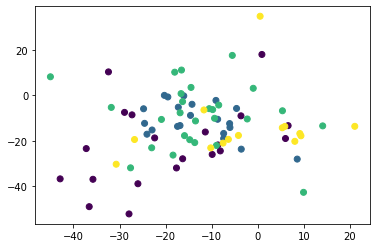

In [ ]:
f_new = mod.predict(image[900:,:,:,:,:])

plt.scatter(f_new[:,0,],f_new[:,1],c = label[900:])
plt.show()

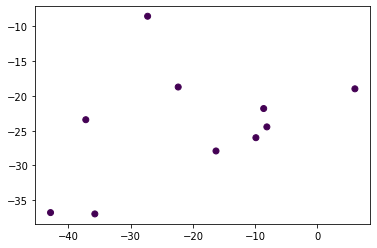

In [ ]:
plt.scatter(f_new[:10,0,],f_new[:10,1],c = label[:10])
plt.show()

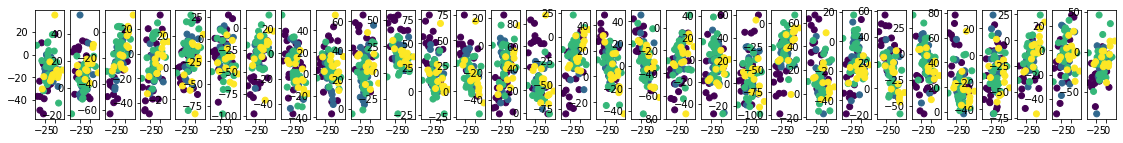

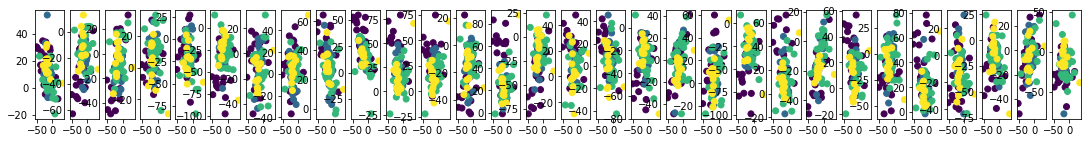

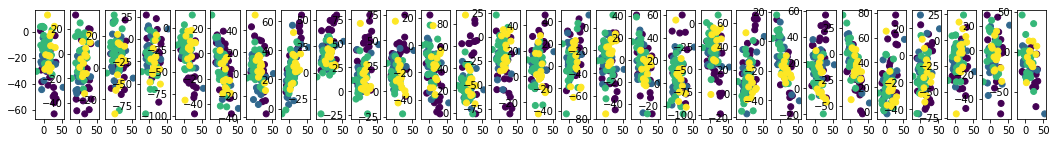

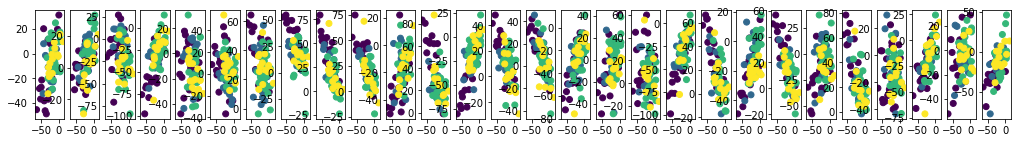

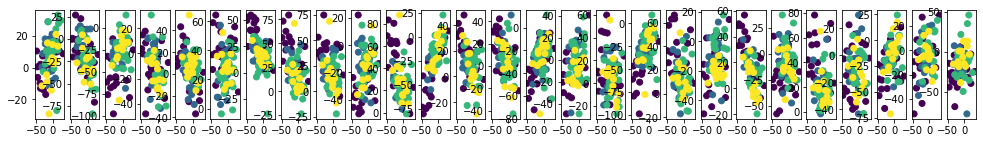

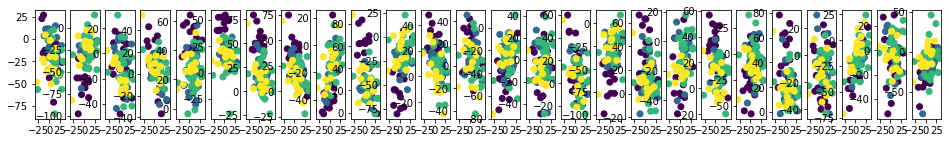

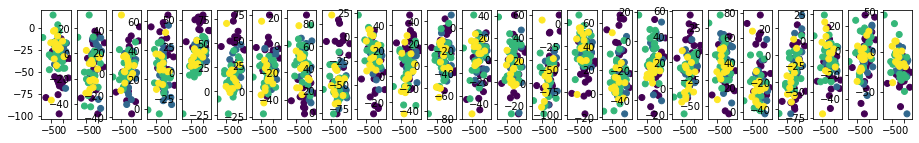

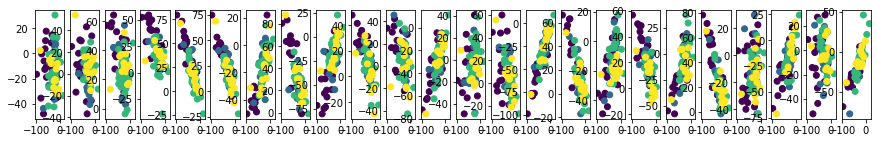

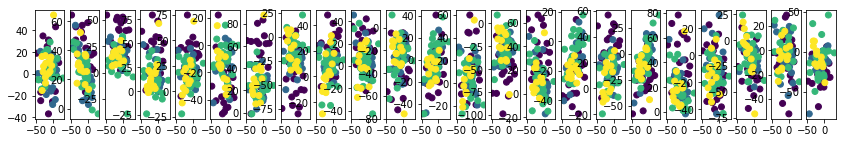

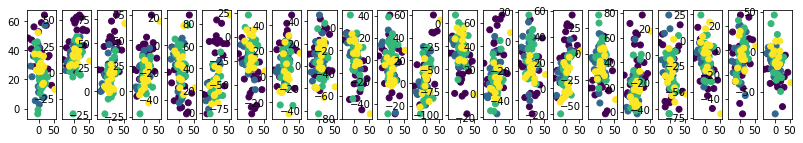

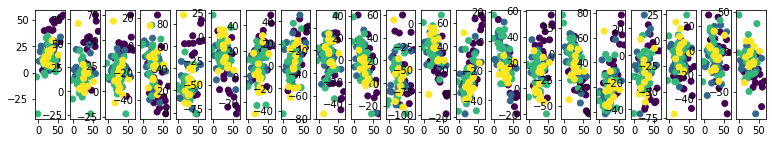

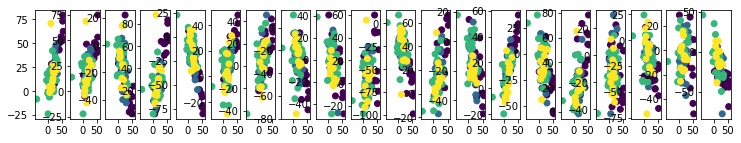

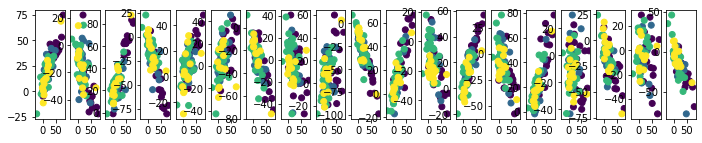

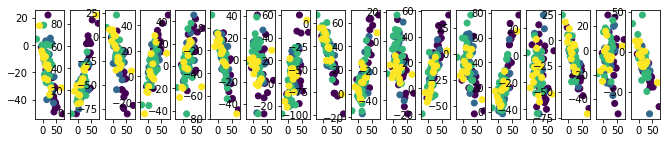

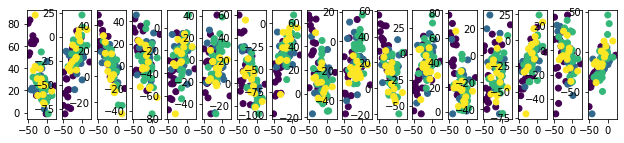

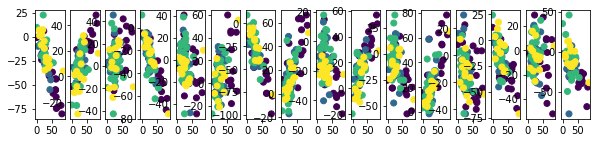

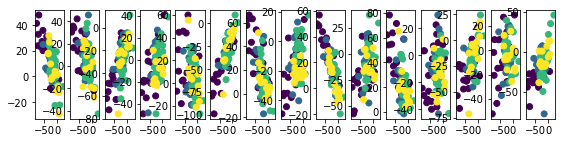

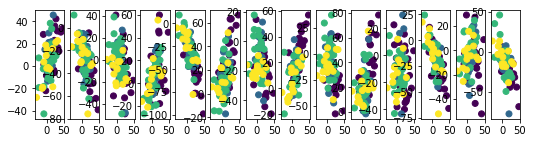

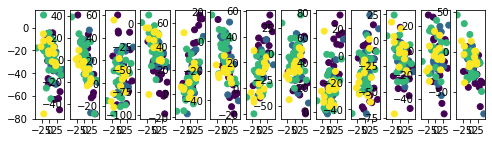

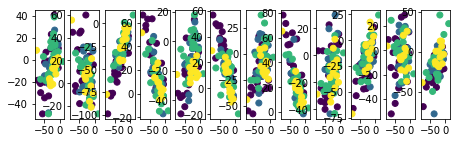

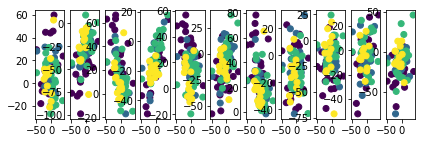

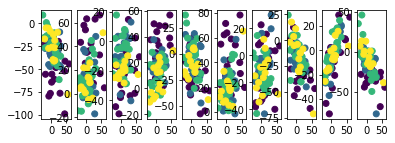

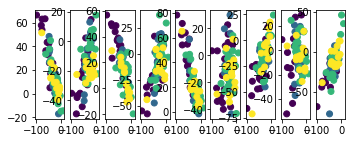

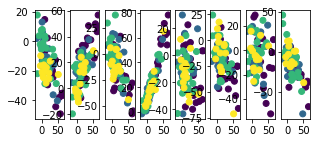

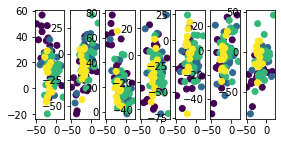

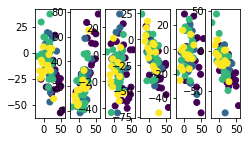

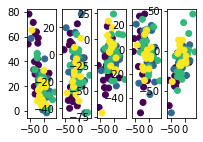

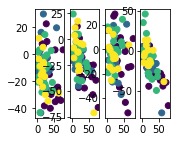

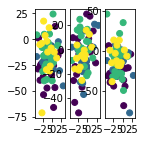

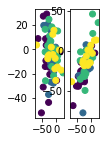

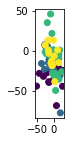

<Figure size 1440x144 with 0 Axes>

In [ ]:
for i in range(32):
  plt.figure(figsize = (20,2))
  for j in range(i+1,32):
    plt.subplot(1,32,j)
    plt.scatter(f_new[:,i,],f_new[:,j],c = label[900:])
  plt.show()

Пока слабо видно качество


In [ ]:
#
# Посмотреть на данные
import tarfile

zipfile = '/gdrive/MyDrive/Face recognition/lfw.tar.gz'
if zipfile.endswith("tar.gz"):
    tar = tarfile.open(zipfile, "r:gz")
elif zipfile.endswith("tar"):
    tar = tarfile.open(zipfile, "r:")
ll = tar.getmembers( )
for k in ll[:10]:
  tar.extract( k )    

tar.close()

In [ ]:
dir_list2[0]

'9e83dc8f-8706-4066-8a52-121812c292ad.jpg'

In [ ]:
image = []
label = []
path_train = '/content/lfw/negative/'
dir_list = os.listdir(path_train)
m = 0
for name in dir_list:
    folder_list = os.listdir(path_train+name+'/')

    print(folder_list)
    z = []
  
    if len(folder_list)>0:
      plt.figure(figsize = (len(folder_list)*3,3))
      for i,k in enumerate(folder_list):
        plt.subplot(1,len(folder_list),i+1)
        img = cv.imread(path_train+name+'/'+k,   )
        z.append(img.shape[:2])
        img = cv.resize(img,(32,32))
        imgl = cv.cvtColor(img, cv.COLOR_RGB2LAB)
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        plt.imshow(img)
        image.append(imgl.reshape(-1,32,32,3))
        label.append(m)
      plt.show()
      m += 1
      print(z)

вАЖЕН ЛИ СПОСОБ СЖАТИЯ?


In [ ]:
class CustomDataGenFace(Sequence):
  
  
  def __init__(self, 
               batch_size,
               input_size=(32, 32, 3),
               zipfile = '/gdrive/MyDrive/Face recognition/casia_faces.tar.gz',
               lab = 1,
               scale = [32,32],
               shuffle=True):

    super().__init__()
    self.batch_size = batch_size # 1
    self.input_size = input_size # 
    self.shuffle = shuffle
    self.scale = scale
    self.lab = lab # Lab
    self.zipfile = zipfile
    if zipfile.endswith("tar.gz"):
      self.tar = tarfile.open(self.zipfile, "r:gz")
    elif zipfile.endswith("tar"):
      self.tar = tarfile.open(self.zipfile, "r:")
    self.ll = self.tar.getmembers( )
    self.tar.close()

  def __del__():
    
    #self.tar.close()
    super().__del__()


  def label_extract(self,index):
    try:
      print(index)
      s = self.ll[index].name.split('/')
      print(s)
      self.tar = tarfile.open(self.zipfile, "r:gz")
      self.tar.extract( self.ll[index] ) 
      self.tar.close()
      print(self.ll[index])
      if s[-2].find('person_')>=0:
        k = s[-2].find('person_')
        print(k)
        label = s[-2][k+7:]
        print(label)
        return int(label)
      else:
        return -1
    except FileNotFoundError:
      return -1      
  
  def image_extract(self,index):
    try:
      s = self.ll[index].name

      img = cv.imread(s )
      img = cv.resize(img,(self.scale[1],self.scale[0]))
      if self.lab:
        img = cv.cvtColor(img, cv.COLOR_RGB2LAB)
      img = img.reshape(-1,self.scale[1],self.scale[0],3)
      return img
    except FileNotFoundError:
      return np.zeros((1,32,32,3))
   #rotate image
  def rotation(self, image, angle):
    s = image.shape
    center=tuple(np.array([s[0],s[1]])/2)
    rot_mat = cv.getRotationMatrix2D(center,angle,1.0)
    new_image = cv.warpAffine(image, rot_mat, (s[1],s[0]))
    return 
    
  
    
  def on_epoch_end(self):
    pass
    
  def __getitem__(self, index):
    #print(index)
    image = []
    label = []
    try:
      i = 0
      while (len(label)<self.batch_size)&(i<self.batch_size*2):
        k = self.label_extract(index+i)
        i += 1
        if k>= 0:
          image_ = self.image_extract(index)
          label_ = k
          print(image_.shape, label_)
          image.append(image_[0,:,:,:])
          label.append(label_)
    
          
      return np.array(image),np.array(label)
    except FileNotFoundError:
      return np.zeros((1,32,32,3)),-1* np.ones((1, ))
  def __len__(self):
    
    return len(self.ll) // self.batch_size

In [ ]:
gen_d = CustomDataGenFace(10)

In [ ]:
I,L = gen_d[209]

209
['casia_faces', 'person_5610', '1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg']
<TarInfo 'casia_faces/person_5610/1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg' at 0x7f09f14b1a10>
0
5610
(1, 32, 32, 3) 5610
209
['casia_faces', 'person_5610', '1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg']
<TarInfo 'casia_faces/person_5610/1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg' at 0x7f09f14b1a10>
0
5610
(1, 32, 32, 3) 5610
209
['casia_faces', 'person_5610', '1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg']
<TarInfo 'casia_faces/person_5610/1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg' at 0x7f09f14b1a10>
0
5610
(1, 32, 32, 3) 5610
209
['casia_faces', 'person_5610', '1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg']
<TarInfo 'casia_faces/person_5610/1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg' at 0x7f09f14b1a10>
0
5610
(1, 32, 32, 3) 5610
209
['casia_faces', 'person_5610', '1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg']
<TarInfo 'casia_faces/person_5610/1764a355-f645-47e7-9ce5-e0d7d66cd2e6.jpg' at 0x7f09f14b1a10>
0
5610
(1, 32, 32, 3) 

In [ ]:
I.shape

(10, 32, 32, 3)

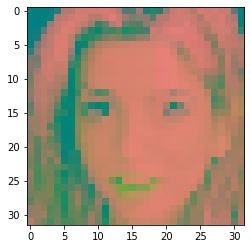

In [ ]:
plt.imshow(I[6,:,:,:])

In [ ]:
L

-1